## Вводная лекция по работе с OpenCV

OpenCV (Open Source Computer Vision Library) — это открытая библиотека для компьютерного зрения, которая предоставляет большое количество функций для анализа изображений и видео. Она активно используется в задачах обработки изображений, распознавания лиц, объектов, а также в системах компьютерного зрения для беспилотных аппаратов, роботов и других автоматизированных систем.

Основные возможности OpenCV:

Чтение и запись изображений и видео

Обработка изображений (фильтрация, преобразования)

Распознавание объектов и лиц

Работа с различными цветовыми пространствами

Обнаружение границ, контуров и особенностей изображения

Интеграция с популярными библиотеками, такими как NumPy и Matplotlib

# 2. Установка OpenCV

In [ ]:
pip install opencv-python

In [ ]:
# Для работы с видеопотоками и другими дополнительными функциями может потребоваться установка расширенной версии OpenCV:
pip install opencv-python-headless

# 3. Основные операции с изображениями

In [1]:
import cv2

In [15]:
# Чтение изображения с диска
image = cv2.imread('flower.png')

# Проверка успешности чтения изображения
if image is None:
    print("Ошибка чтения изображения!")

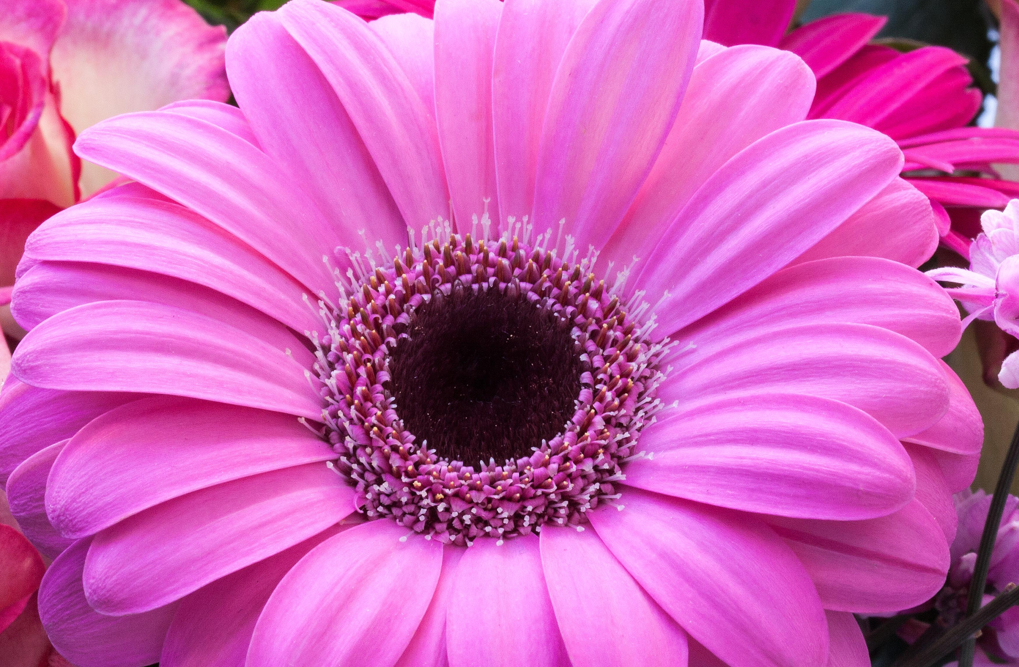

In [7]:
cv2.imshow('Изображение', image) #Отображение изображения:
cv2.waitKey(0)  # Ожидание нажатия любой клавиши
cv2.destroyAllWindows()  # Закрытие всех окон

In [8]:
cv2.imwrite('new_image.jpg', image) #Сохранение изображения:

True

OpenCV поддерживает различные цветовые пространства (BGR, RGB, HSV и др.). По умолчанию изображения загружаются в формате BGR, но мы можем преобразовать изображение в другие цветовые пространства:

In [1]:
# Конвертация BGR в Grayscale:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale', gray_image)
cv2.waitKey(0)

NameError: name 'cv2' is not defined

In [10]:
# Конвертация BGR в HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV', hsv_image)
cv2.waitKey(0)


-1

# Применение фильтров

In [11]:
# Размытие изображения (Gaussian Blur):
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)
cv2.imshow('Blurred Image', blurred_image)
cv2.waitKey(0)


-1

In [12]:
# Выделение границ (Canny Edge Detection):
edges = cv2.Canny(image, 100, 200)
cv2.imshow('Edges', edges)
cv2.waitKey(0)

-1

#  Захват видео с камеры

In [ ]:
# Открывается соединение с веб-камерой. Аргумент `0` обычно указывает на стандартную или встроенную камеру устройства. 
# Если подключена другая камера, вместо `0` может быть использован другой индекс.
cap = cv2.VideoCapture(0)
# `while True`: Запускается бесконечный цикл для постоянного захвата и отображения видео.
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    cv2.imshow('Видеопоток', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
# race_car.mp4

In [ ]:
# Открывается соединение с веб-камерой. Аргумент `0` обычно указывает на стандартную или встроенную камеру устройства. 
# Если подключена другая камера, вместо `0` может быть использован другой индекс.
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID') #Указывает кодек для записи видео. `XVID` - один из популярных кодеков для сжатия видео.
# который сохраняет видео в файл 'output.avi'. Здесь `20.0` - это количество кадров в секунду,
# а `(640, 480)` - разрешение видео.
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))
# `while: Запускается бесконечный цикл для постоянного захвата и отображения видео.
while cap.isOpened():
#     Захватывает текущий кадр с веб-камеры.
    ret, frame = cap.read()
    if not ret:
        break
#      Записывает текущий кадр в файл.
    out.write(frame)
#     Отображает кадр в окне под названием "Recording".
    cv2.imshow('Recording', frame)
#     Позволяет пользователю прервать запись и просмотр видео при нажатии клавиши 'q'.
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Освобождает видеопоток от вебкамеры.
cap.release()
# Закрывает файл с записанным видео и высвобождает ресурсы.
out.release()
# Закрывает все окна, созданные `cv2.imshow()`.
cv2.destroyAllWindows()


# Лекция 2: Работа с изображениями и видео в OpenCV. Продвинутые техники

### Обнаружение и работа с контурами

Контуры — это кривые, соединяющие последовательные точки с одинаковым цветом или интенсивностью. Они могут использоваться для определения границ объектов на изображении.

In [2]:
import cv2

# Преобразуем изображение в оттенки серого и применяем фильтр Canny
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 10, 200)

# Найдем контуры
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Нарисуем контуры на изображении
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
cv2.imshow('Contours', image)
cv2.waitKey(0)


NameError: name 'image' is not defined

In [14]:
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000:  # Фильтр по минимальной площади
        cv2.drawContours(image, [contour], -1, (255, 0, 0), 2)

cv2.imshow('Filtered Contours', image)
cv2.waitKey(0)


-1

In [ ]:
filtered_image = image.copy()

<!-- Морфологические преобразования -->

# Морфологические преобразования

Морфологические операции, такие как эрозия и дилатация, полезны для устранения шумов, улучшения контуров объектов и подготовки изображений к дальнейшей обработке.

In [19]:
# Эрозия и дилатация
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
#  Здесь создается прямоугольный структурирующий элемент размером 5x5 пикселей, который будет использоваться 
#     для эрозии и дилатации. Этот элемент определяет форму и размер операций.
# Эрозия
# Эрозия уменьшает области ярких пикселей. Это делается путем сканирования 
# изображения с помощью заданного структурирующего элемента и замены каждого центрального
# пикселя значением минимального среди соседних в области окна. Один проход (`iterations=1`) достаточно для 
# этой операции. Полученное изображение будет представлено в новом окне с заголовком `'Eroded'`.
eroded = cv2.erode(image, kernel, iterations=1)
cv2.imshow('Eroded', eroded)
cv2.waitKey(0)
# Дилатация — это обратная операция эрозии; она увеличивает области ярких пикселей. 
# В этой операции каждому центральному пикселю присваивается максимальное значение среди его соседей в зоне действия
# структурирующего элемента. Изображение после дилатации будет открыто в новом окне под названием `'Dilated'`.
# Дилатация
dilated = cv2.dilate(image, kernel, iterations=1)
cv2.imshow('Dilated', dilated)
cv2.waitKey(0)


-1

Операции "Открытие" и "Закрытие"

Открытие (erosion + dilation) используется для удаления мелких объектов, а закрытие (dilation + erosion) — для заполнения пробелов.

In [20]:
# Открытие
opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
cv2.imshow('Opened', opened)
cv2.waitKey(0)

# Закрытие
closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
cv2.imshow('Closed', closed)
cv2.waitKey(0)


-1

# Геометрические трансформации

Геометрические трансформации позволяют изменять положение, масштаб и ориентацию изображения.

In [21]:
# Изменение размера
resized_image = cv2.resize(image, (300, 300))
cv2.imshow('Resized', resized_image)
cv2.waitKey(0)


-1

In [22]:
# Поворот изображения
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)  # Поворот на 45 градусов
rotated = cv2.warpAffine(image, M, (w, h))
cv2.imshow('Rotated', rotated)
cv2.waitKey(0)


-1

# Операция трансляции

In [23]:
import numpy as np
M = np.float32([[1, 0, 100], [0, 1, 50]])  # Сдвиг на 100 пикселей вправо и на 50 вниз
shifted = cv2.warpAffine(image, M, (w, h))
cv2.imshow('Shifted', shifted)
cv2.waitKey(0)


-1

# Обнаружение объектов с помощью Haar Cascades

Haar каскады — это метод обнаружения объектов, особенно полезный для распознавания лиц и других характерных объектов.

In [26]:
image = cv2.imread(r"C:\Users\vahahat\Pictures\Screenshots\Screenshot 2024-10-21 190711.png")
# Загрузка каскада для лиц
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Преобразование изображения в оттенки серого
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Обнаружение лиц
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Рисуем прямоугольники вокруг лиц
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2.imshow('Detected Faces', image)
cv2.waitKey(0)


-1

In [30]:
cap = cv2.VideoCapture('race_car.mp4')
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    fgmask = fgbg.apply(frame)  # Применение фоново-субстракторной маски
    cv2.imshow('Foreground Mask', fgmask)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
